In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import moabb
moabb.set_log_level('info')

from moabb.datasets import BNCI2014001
dataset = BNCI2014001()
dataset.subject_list = dataset.subject_list[:2]

from moabb.paradigms import MotorImagery

p = MotorImagery(n_classes=4)
timeseries, labels, table = p.get_data(dataset, dataset.subject_list[:2])

2021-02-09 23:32:46 phi root[29851] WARNING Choosing from all possible events


In [2]:
from moabb.pipelines.fbcsp_select import FBCSP_Select

In [3]:
estimator = FBCSP_Select()

In [4]:
estimator.fit(timeseries, labels)
r = estimator.transform(timeseries)

In [5]:
r.shape

(1152, 8, 1001)

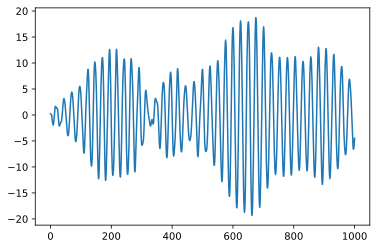

In [6]:
plt.plot(r[0,0])

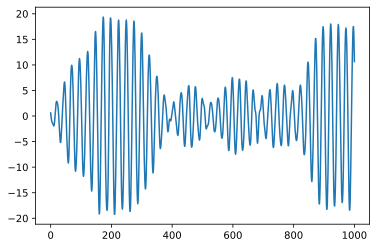

In [7]:
plt.plot(r[4,0])

In [8]:
from numpy.fft import fft
def superfft(signal, fs=250):
    f = fft(signal)
    x = np.linspace(0, fs/2, len(f)//2)
    return x, abs(f)[:len(f)//2]

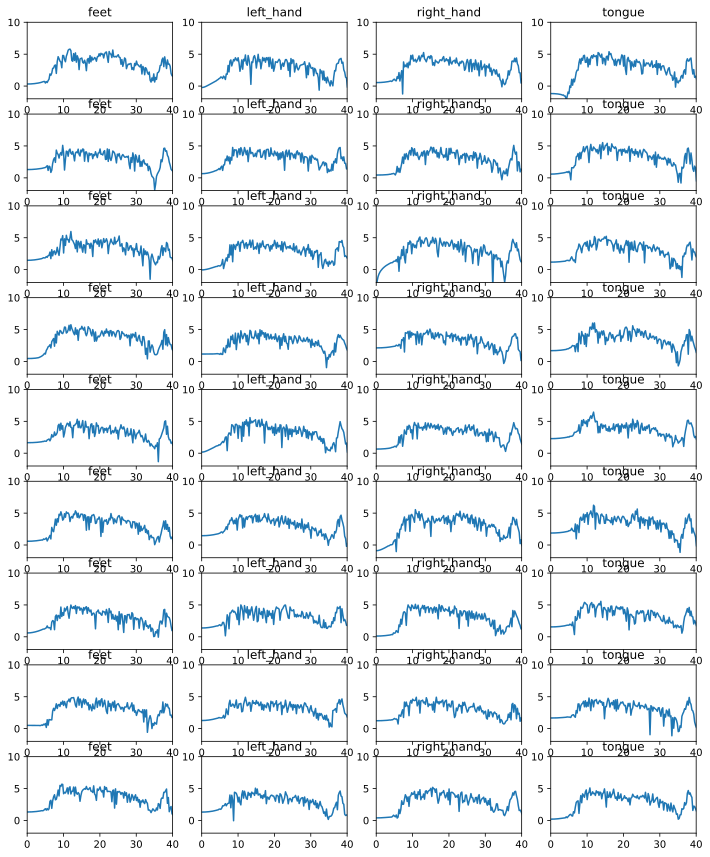

In [9]:
s = np.argsort(labels)

plt.rcParams['figure.figsize'] = [12, 20]

for j in range(0, 36):
    k = j//9 + 4*(j%9) + 1
    plt.subplot(12,4,k)
    u, v = superfft(r[s[j*32], 7])
    v = np.log(v)
    plt.plot(u, v)
    plt.title(labels[s[j*32]])
    plt.xlim([0, 40])
    plt.ylim([-2, 10])
    #plt.yscale('log')